# Import python libraries

In [735]:
import pandas as pd
import matplotlib as plt
import psycopg2 as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

# Make connection to NFLDB datbase

In [734]:
%matplotlib inline
conn = pg.connect("dbname=nfldb user=nfldb")
sns.set(color_codes=True)

# Exploratory Data Analysis on Wide Receivers

This is a line plot showing the number of targets for the top 9 wide receivers over the 17 season.


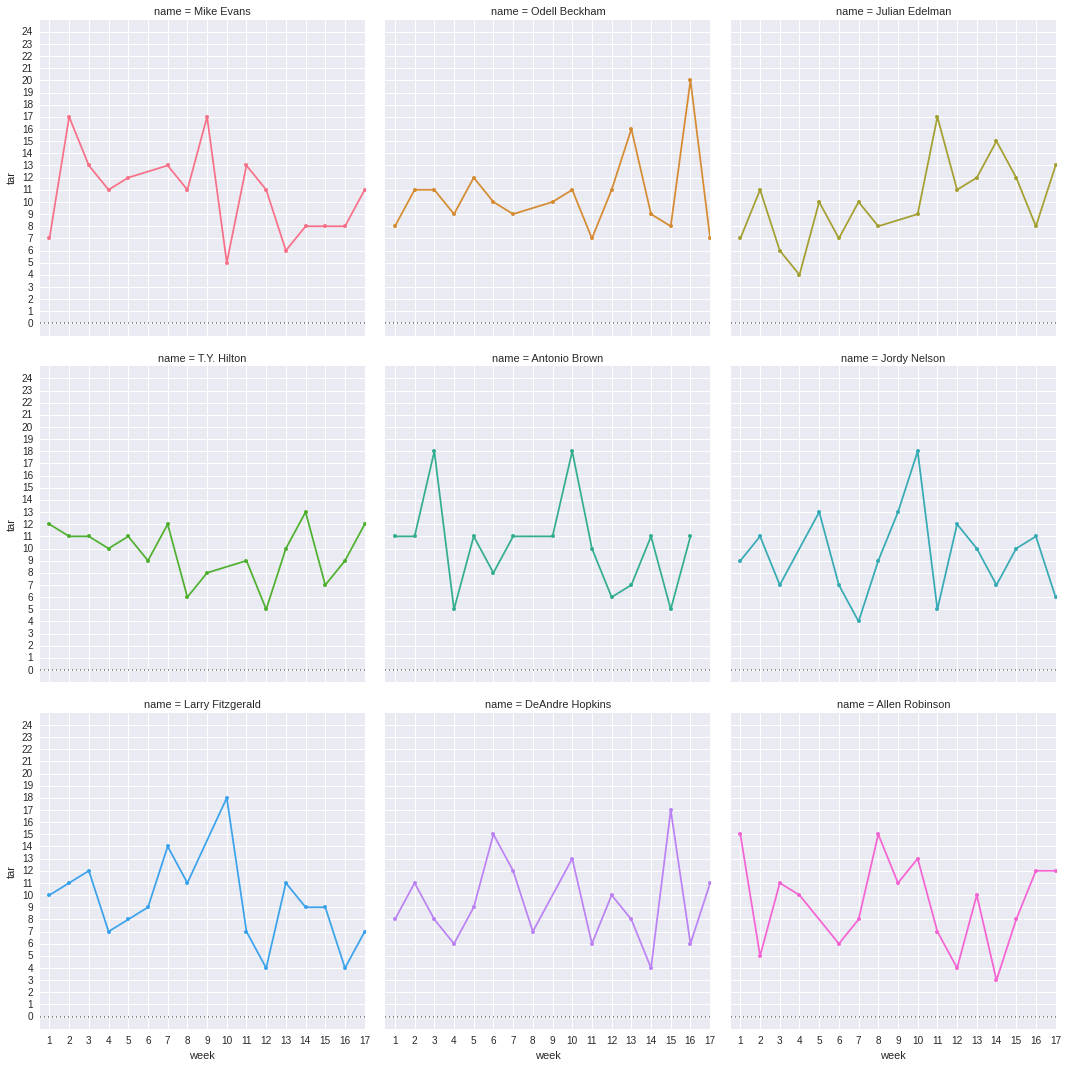

In [710]:
df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

df_wr = pd.read_sql("select player.full_name AS wr, player.team, sum(play_player.receiving_tar) AS tar \
from player \
inner join play_player \
ON player.player_id = play_player.player_id \
inner join game \
on game.gsis_id = play_player.gsis_id \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND play_player.receiving_tar > 0 \
GROUP BY player.full_name, player.team \
ORDER by tar desc \
limit 9", conn)

df_tot = pd.DataFrame([])

for wr in df_wr['wr']:
    for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.full_name AS name, sum(play_player.receiving_tar) AS tar \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'yes' \
        AND game.week = %(row)s \
        AND play_player.receiving_tar > 0 \
        AND player.full_name = %(wr)s \
        group by game.week, player.full_name, player.team \
        order by tar desc", conn, params={'row':x, 'wr':wr})
        df_tot = df_tot.append(df_tar, ignore_index=True)

        
# sns.lmplot(x="week", y="tar", col="name", data=df_tot, palette="Set1", aspect=1);

grid = sns.FacetGrid(df_tot, col="name", hue="name", col_wrap=3, size=5)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, "week", "tar", marker="o", ms=4)
grid.set(xticks=np.arange(18), yticks=np.arange(25),
         xlim=(.5, 17), ylim=(-1, 25))

# Exploratory Data Analysis on Running Backs

This is a line plot showing the number of attempts for the top 9 running backs over the 17 season.


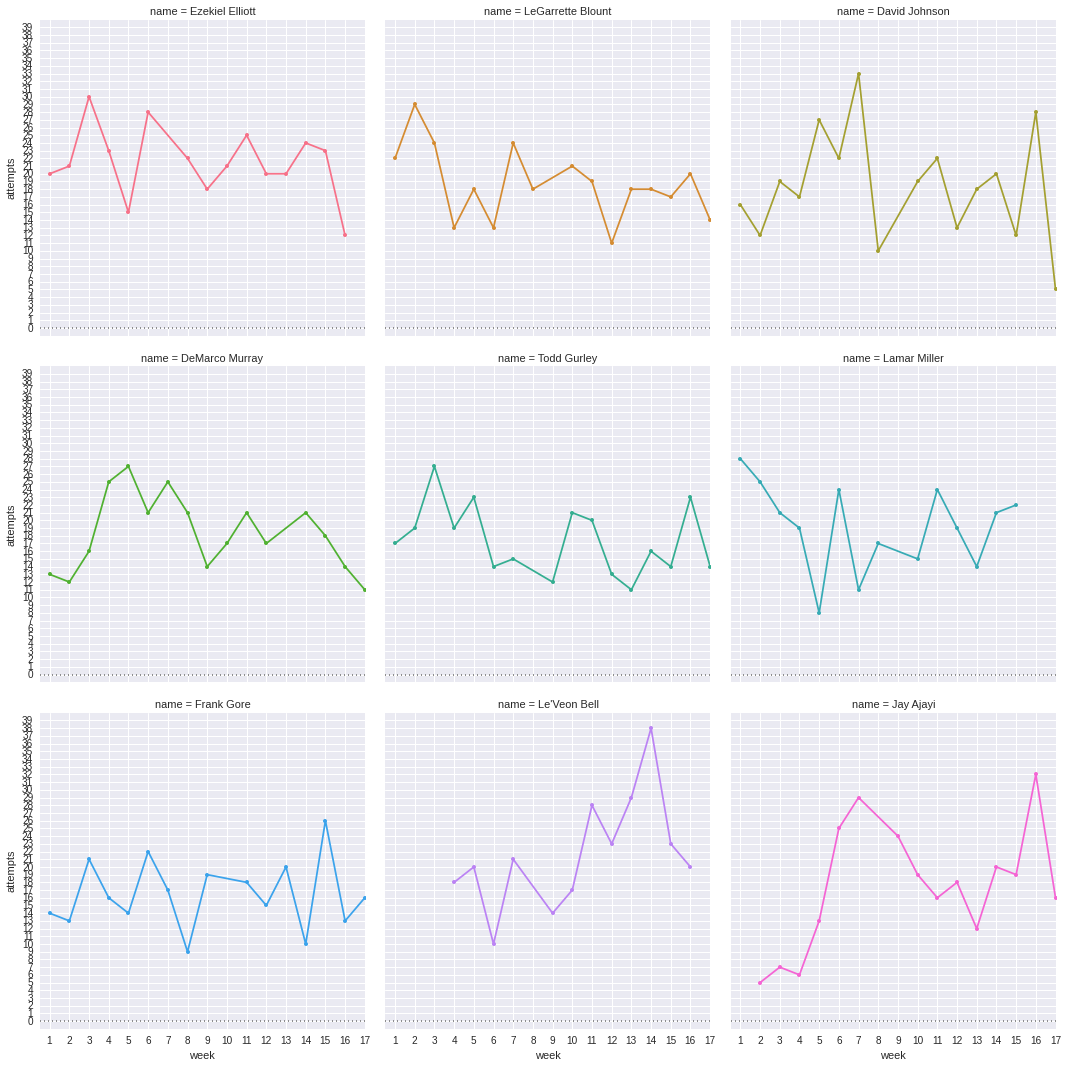

In [709]:
df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:3]

df_rb = pd.read_sql("select player.full_name AS rb, player.team, sum(play_player.rushing_att) AS att \
from player \
inner join play_player \
ON player.player_id = play_player.player_id \
inner join game \
on game.gsis_id = play_player.gsis_id \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND play_player.rushing_att > 0 \
GROUP BY player.full_name, player.team \
ORDER by att desc \
limit 9", conn)

df_tot = pd.DataFrame([])

for rb in df_rb['rb']:
    for x in df_week['week']:
        df_att = pd.read_sql("select game.week, player.full_name AS name, sum(play_player.rushing_att) AS attempts \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'yes' \
        AND game.week = %(row)s \
        AND play_player.rushing_att > 0 \
        AND player.full_name = %(rb)s \
        group by game.week, player.full_name, player.team \
        order by attempts desc", conn, params={'row':x, 'rb':rb})
        df_tot = df_tot.append(df_att, ignore_index=True)

        
grid = sns.FacetGrid(df_tot, col="name", hue="name", col_wrap=3, size=5)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, "week", "attempts", marker="o", ms=4)
grid.set(xticks=np.arange(18), yticks=np.arange(40),
         xlim=(.5, 17), ylim=(-1, 40))

# Exploratory Data Analysis on Running Backs

This is a regression plot showing the trends of rushing attempts for the top 9 running backs over the 17 season.


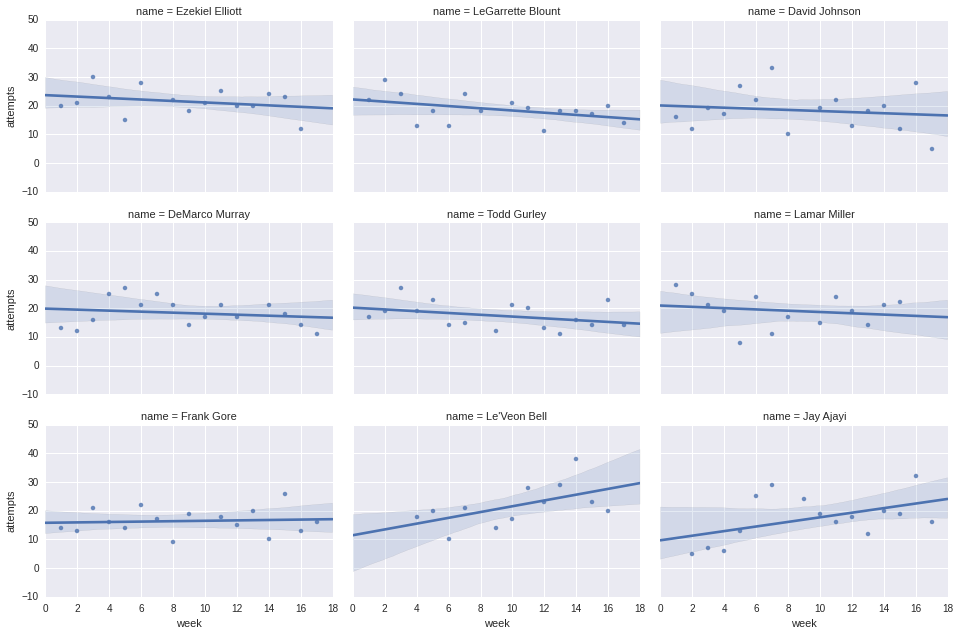

In [698]:
df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:3]

df_rb = pd.read_sql("select player.full_name AS rb, player.team, sum(play_player.rushing_att) AS att \
from player \
inner join play_player \
ON player.player_id = play_player.player_id \
inner join game \
on game.gsis_id = play_player.gsis_id \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND play_player.rushing_att > 0 \
GROUP BY player.full_name, player.team \
ORDER by att desc \
limit 9", conn)

df_tot = pd.DataFrame([])

for rb in df_rb['rb']:
    for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.full_name AS name, sum(play_player.rushing_att) AS attempts \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'yes' \
        AND game.week = %(row)s \
        AND play_player.rushing_att > 0 \
        AND player.full_name = %(rb)s \
        group by game.week, player.full_name, player.team \
        order by attempts desc", conn, params={'row':x, 'rb':rb})
        df_tot = df_tot.append(df_tar, ignore_index=True)

        
sns.lmplot(x="week", y="attempts", col="name", data=df_tot, aspect=1.5, palette="Set1", col_wrap=3, size=3);

# Exploratory Data Analysis on Quarterbacks

This is a regression plot showing the number of passing attempts for the top 9 quarterbacks over the 17 season.
The bottom scatter plot shows the average of passing attempts for the 9 quarterbacks.


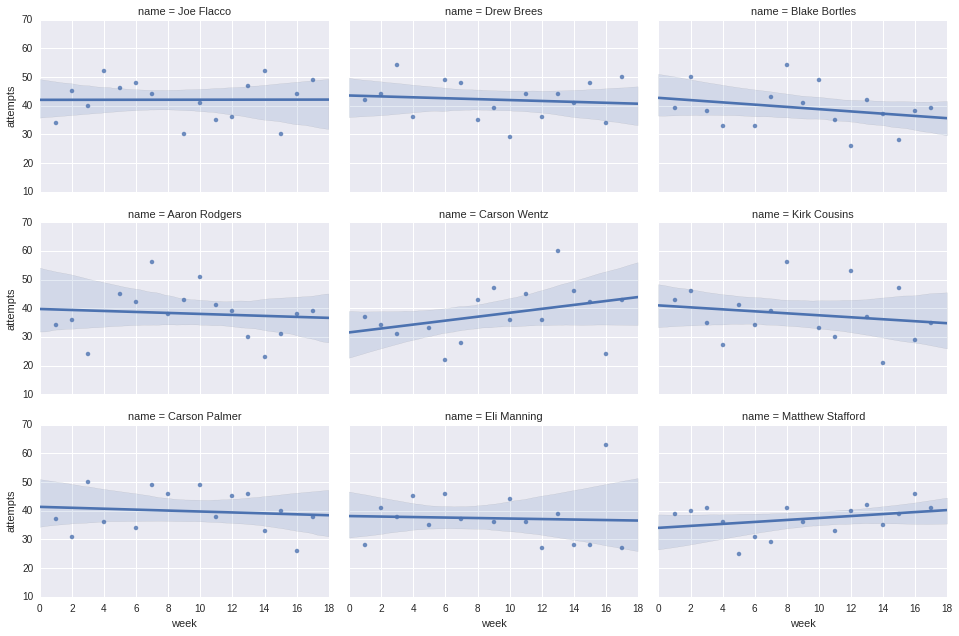

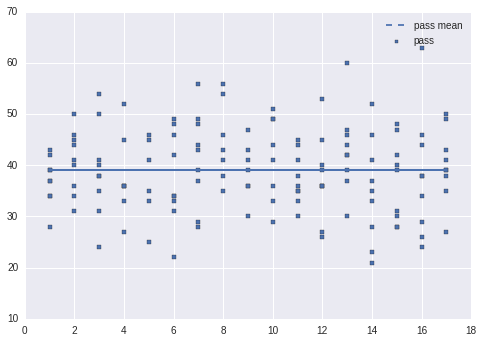

In [713]:
df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

df_qb = pd.read_sql("select player.full_name AS qb, player.team, sum(play_player.passing_att) AS att \
from player \
inner join play_player \
ON player.player_id = play_player.player_id \
inner join game \
on game.gsis_id = play_player.gsis_id \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND play_player.passing_att > 0 \
GROUP BY player.full_name, player.team \
ORDER by att desc \
limit 9", conn)

#df_week = df_week[:7]
df_tot = pd.DataFrame([])

for qb in df_qb['qb']:
    for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.full_name AS name, sum(play_player.passing_att) AS attempts, \
        sum(play_player.passing_cmp) AS cmp \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'yes' \
        AND game.week = %(row)s \
        AND play_player.passing_att > 0 \
        AND player.full_name = %(qb)s \
        group by game.week, player.full_name, player.team \
        order by attempts desc", conn, params={'row':x, 'qb':qb})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

        
sns.lmplot(x="week", y="attempts", col="name", data=df_tot, aspect=1.5, palette="Set1", col_wrap=3, size=3);


fig = plt.figure()
ax1 = fig.add_subplot(111)

x = df_tot['week']
y = df_tot['attempts']
y_mean = [np.mean(y) for i in y]


ax1.scatter(x, y, s=10, c='b', marker="s", label='pass')
mean_line = ax1.plot(x,y_mean, label='pass mean', linestyle='--')
plt.legend();
plt.show()


# Exploratory Data Analysis on Quarterbacks

This is a scatter plot showing the average number of passing attempts for all quarterbacks every week over the 2017 season.

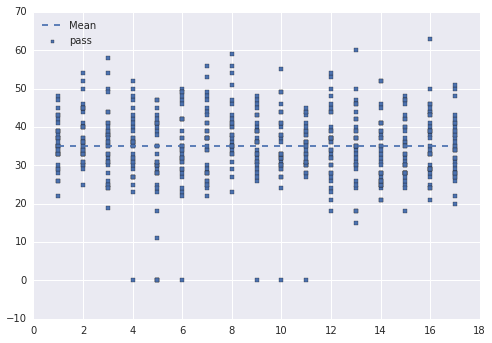

In [1076]:

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)


df_tot = pd.DataFrame([])

for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.team, \
        sum(play_player.rushing_att) AS rush, \
        sum(play_player.passing_att) AS pass \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND game.week =  %(row)s\
        AND player.team !=  'UNK' \
        GROUP BY game.week, player.team \
        ORDER by week asc", conn, params={'row':x, 'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)
        
# df_tot      
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = df_tot['week']
y = df_tot['pass']
y_mean = [np.mean(y) for i in y]


ax1.scatter(x, y, s=10, c='b', marker="s", label='pass')
mean_line = ax1.plot(x,y_mean, label='Mean', linestyle='--')
plt.legend(loc='upper left');
plt.show()



# Exploratory Data Analysis on NFL teams

This is a regression plot showing the number of passing and rushing plays for 6 NFL teams over the 17 week season.
The bottom scatter plot shows the average of passing and rushing plays for the same timeframe.

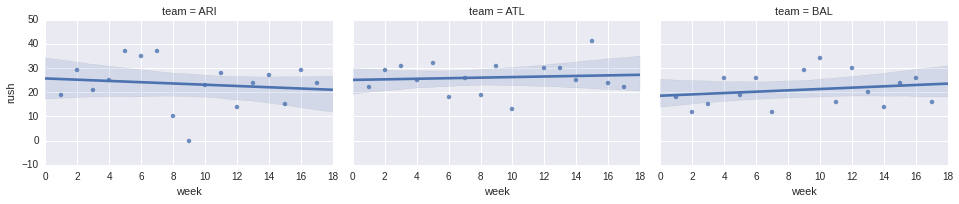

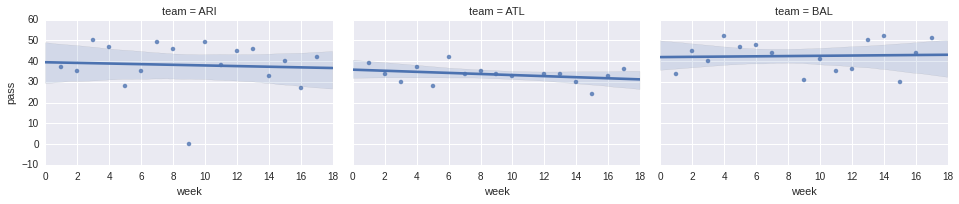

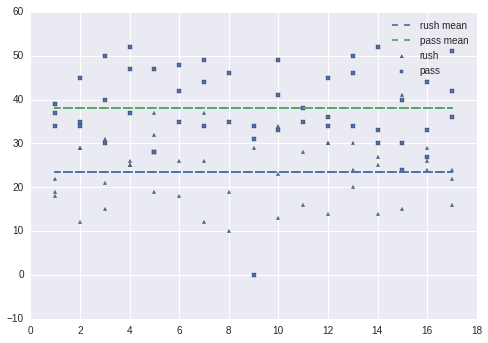

In [711]:
import sys
df_team = pd.read_sql("select team_id from team \
limit 3", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
    for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.team, \
        sum(play_player.rushing_att) AS rush, \
        sum(play_player.passing_att) AS pass \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND game.week =  %(row)s\
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY game.week, player.team \
        ORDER by week asc", conn, params={'row':x, 'team':team})
       
        df_tot = df_tot.append(df_tar, ignore_index=True)

        
df_tot 
        

    
sns.lmplot(x="week", y="rush", col="team", data=df_tot, aspect=1.5, palette="Set1", col_wrap=3, size=3);
sns.lmplot(x="week", y="pass", col="team", data=df_tot, aspect=1.5, palette="Set1", col_wrap=3, size=3);


fig = plt.figure()
ax1 = fig.add_subplot(111)

x = df_tot['week']
y = df_tot['pass']
y2 = df_tot['rush']
y_mean = [np.mean(y) for i in y]
y2_mean = [np.mean(y2) for i in y2]


ax1.scatter(x, y2, s=10, c='b', marker="^", label='rush')
ax1.scatter(x, y, s=10, c='b', marker="s", label='pass')

mean_line = ax1.plot(x,y2_mean, label='rush mean', linestyle='--')
mean_line = ax1.plot(x,y_mean, label='pass mean', linestyle='--')

plt.legend();
plt.show()



# Exploratory Data Analysis on Quarterbacks

This is a line plot showing the average number of passing attempts, passing completions, and completion percentage for all quarterbacks every week over the 2017 season.

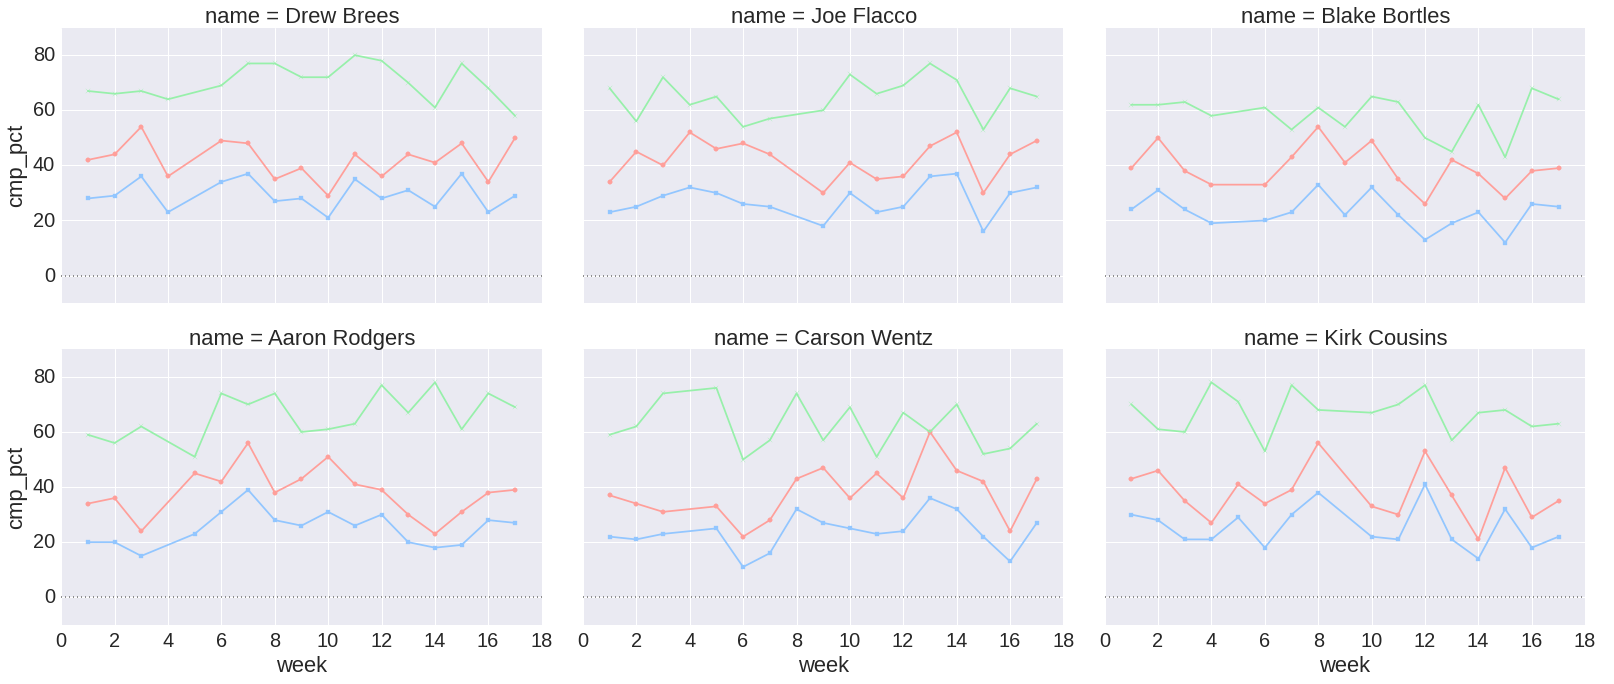

In [527]:
import matplotlib.cm as cm


df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

df_qb = pd.read_sql("select player.full_name AS qb, player.team, sum(play_player.passing_att) AS att \
from player \
inner join play_player \
ON player.player_id = play_player.player_id \
inner join game \
on game.gsis_id = play_player.gsis_id \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND play_player.passing_att > 0 \
GROUP BY player.full_name, player.team \
ORDER by att desc \
limit 6", conn)

# df_week = df_week[:7]
df_tot = pd.DataFrame([])

for qb in df_qb['qb']:
    for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.full_name AS name, sum(play_player.passing_att) AS attempts, \
        sum(play_player.passing_cmp) AS cmp, \
        round(sum(play_player.passing_cmp)/sum(play_player.passing_att)::float*100) AS cmp_pct \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'yes' \
        AND game.week = %(row)s \
        AND play_player.passing_att > 0 \
        AND player.full_name = %(qb)s \
        group by game.week, player.full_name, player.team \
        order by attempts desc", conn, params={'row':x, 'qb':qb})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)
  
g = sns.FacetGrid(df_tot, col="name", aspect=1.5, col_wrap=3, size=5)
g.map(plt.axhline, y=0, ls=":", c=".5")
g.map(plt.scatter, "week", "attempts", marker="o", color='r')
g.map(plt.scatter, "week", "cmp", marker="s", color='b')
g.map(plt.scatter, "week", "cmp_pct", marker="x", color='g')

g.map(plt.plot, "week", "attempts", marker="o", ms=4, color='r')
g.map(plt.plot, "week", "cmp", marker="s", ms=4, color='b')
g.map(plt.plot, "week", "cmp_pct", marker="x", ms=4, color='g')

g.add_legend();





# Exploratory Data Analysis on a Running Back

This is a series of weekly regression plots showing the average number of rushsing attempts for Ezekiel Elliott.

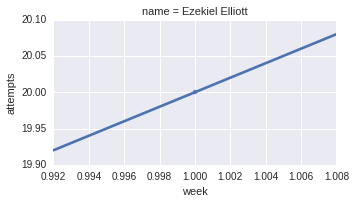

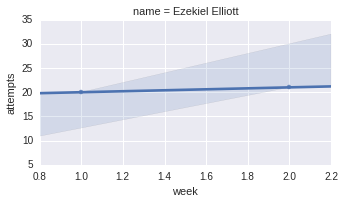

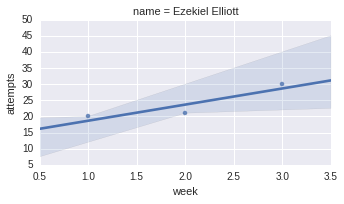

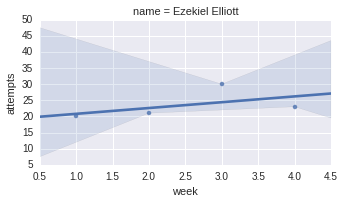

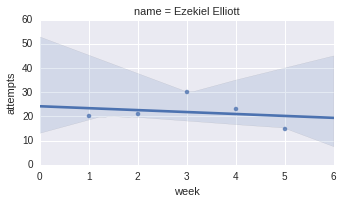

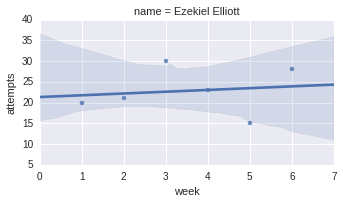

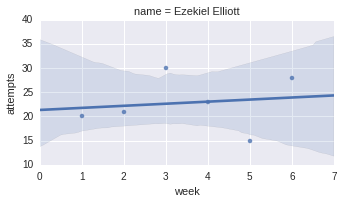

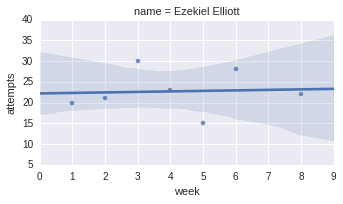

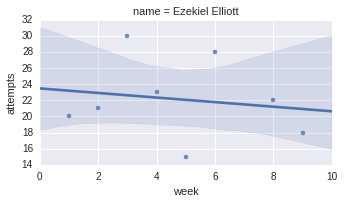

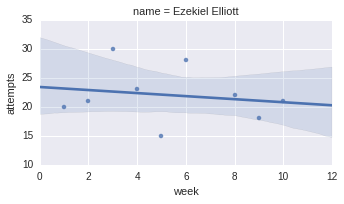

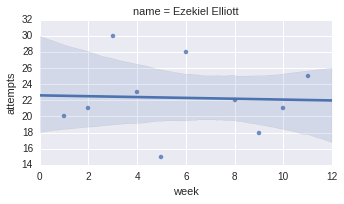

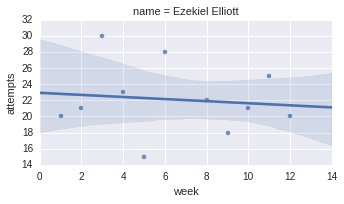

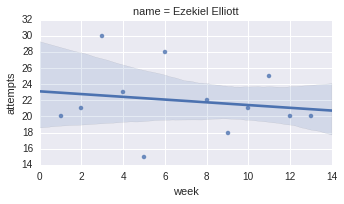

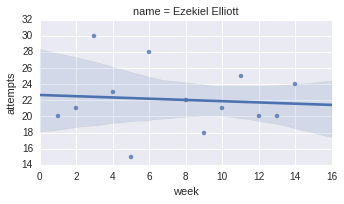

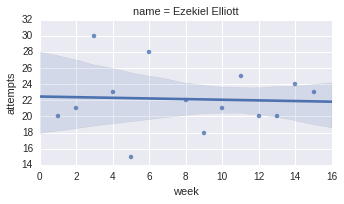

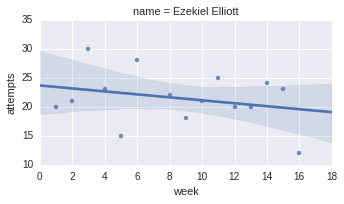

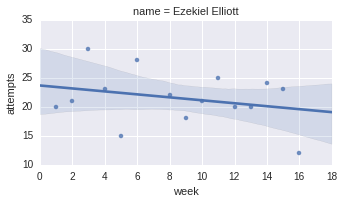

In [712]:
df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:3]

df_rb = pd.read_sql("select player.full_name AS rb, player.team, sum(play_player.rushing_att) AS att \
from player \
inner join play_player \
ON player.player_id = play_player.player_id \
inner join game \
on game.gsis_id = play_player.gsis_id \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND play_player.rushing_att > 0 \
GROUP BY player.full_name, player.team \
ORDER by att desc \
limit 1", conn)

df_tot = pd.DataFrame([])

for rb in df_rb['rb']:
    for x in df_week['week']:
        df_tar = pd.read_sql("select game.week, player.full_name AS name, sum(play_player.rushing_att) AS attempts \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'yes' \
        AND game.week = %(row)s \
        AND play_player.rushing_att > 0 \
        AND player.full_name = %(rb)s \
        group by game.week, player.full_name, player.team \
        order by attempts desc", conn, params={'row':x, 'rb':rb})
        df_tot = df_tot.append(df_tar, ignore_index=True)

        
        sns.lmplot(x="week", y="attempts", col="name", data=df_tot, aspect=1.5, palette="Set1", col_wrap=3, size=3);
    break

# Question:  Is the average weight of the offensive line a function of total yards

The answer is no.  The top 3 teams with the most offensive yards have below average offensive line weight.

            NFL average: 5823 total yards 
1. New Orleans Saints:   7040 total yards (75% quartile)
2. Atlanta Falcons:      6881 total yards (75% quartile)
3. New England Patriots: 6776 total yards (75% quartile)
            
  NFL Average OL weight: 314.03 lbs
1. New Orleans Saints:   311.00 lbs (50% quartile)
2. Atlanta Falcons:      305.25 lbs (25% quartile)
3. New England Patriots: 313.75 lbs (50% quartile)
            


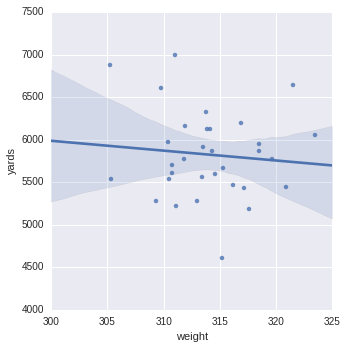

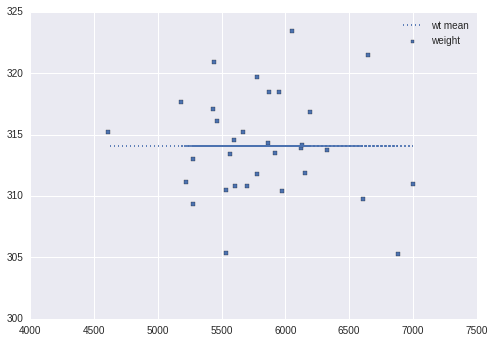

,yards,weight
count,32.000000,32.000000
mean,5823.843750,314.037813
std,515.480115,4.290586
min,4610.000000,305.250000
25%,5516.750000,310.945000
50%,5775.500000,313.820000
75%,6122.500000,316.942500
max,7000.000000,323.440000


In [728]:
import sys
import time

df_team = pd.read_sql("select team_id from team", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_oht1 = pd.DataFrame([])

for x in df_team['team_id']:
        df_oht = pd.read_sql("select team, round(avg(weight),2) AS weight \
        from player \
        WHERE player.status = 'Active' AND (player.position = 'OT' or player.position = 'OG' or player.position = 'C' \
        or player.position = 'T' or player.position = 'OL' or player.position = 'G') \
        AND team = %(team)s \
        group by team", conn, params={'team':x})

#       df_oht = df_oht.dropna()
        df_oht1 = df_oht1.append(df_oht, ignore_index=True)
        
# print df_oht1
       
        

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
        df_tar = pd.read_sql("select player.team, \
        sum(play_player.rushing_yds) + sum(play_player.passing_yds) AS yards \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY player.team \
        ORDER by yards asc", conn, params={'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

df_tot = pd.merge(df_tot, df_oht1, how='inner')

# df_tot

sns.lmplot(x="weight", y="yards", data=df_tot);

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = df_tot['yards']
y = df_tot['weight']

y_mean = [np.mean(y) for i in y]




ax1.scatter(x, y, s=10, c='b', marker="s", label='weight')


mean_line = ax1.plot(x,y_mean, label='wt mean', linestyle=':')

plt.legend();
plt.show()

df_tot.describe()
 


# Question:  Is the average height of the offensive line a function of total yards

The answer is no.  The top 3 teams with the most offensive yards have below average offensive line weight.

            NFL average: 5823 total yards 
1. New Orleans Saints:   7040 total yards (75% quartile)
2. Atlanta Falcons:      6881 total yards (75% quartile)
3. New England Patriots: 6776 total yards (75% quartile)
            
  NFL Average OL height: 76.76 inches
1. New Orleans Saints:   76.44 inches (50% quartile)
2. Atlanta Falcons:      76.38 inches (25% quartile)
3. New England Patriots: 76.65 inches (50% quartile)

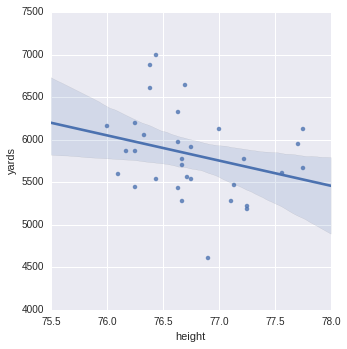

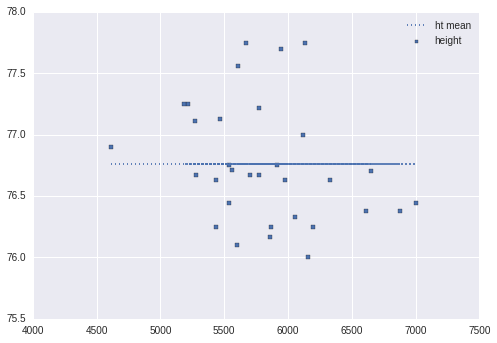

,yards,height
count,32.000000,32.000000
mean,5823.843750,76.763125
std,515.480115,0.489018
min,4610.000000,76.000000
25%,5516.750000,76.380000
50%,5775.500000,76.670000
75%,6122.500000,77.115000
max,7000.000000,77.750000


In [730]:
import sys
import time

df_team = pd.read_sql("select team_id from team", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_oht1 = pd.DataFrame([])

for x in df_team['team_id']:
        df_oht = pd.read_sql("select team, round(avg(height),2) AS height \
        from player \
        WHERE player.status = 'Active' AND (player.position = 'OT' or player.position = 'OG' or player.position = 'C' \
        or player.position = 'T' or player.position = 'OL' or player.position = 'G') \
        AND team = %(team)s \
        group by team", conn, params={'team':x})

#       df_oht = df_oht.dropna()
        df_oht1 = df_oht1.append(df_oht, ignore_index=True)
        
# print df_oht1
       
        

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
        df_tar = pd.read_sql("select player.team, \
        sum(play_player.rushing_yds) + sum(play_player.passing_yds) AS yards \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY player.team \
        ORDER by yards asc", conn, params={'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

df_tot = pd.merge(df_tot, df_oht1, how='inner')

sns.lmplot(x="height", y="yards", data=df_tot);

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = df_tot['yards']
y = df_tot['height']

y_mean = [np.mean(y) for i in y]




ax1.scatter(x, y, s=10, c='b', marker="s", label='height')


mean_line = ax1.plot(x,y_mean, label='ht mean', linestyle=':')

plt.legend();
plt.show()

df_tot.describe()

# Exploratory Data Analysis on Offensive Lines

This is a heatmap with all NFL teams average offensive line weight and total yards for the 2016 season

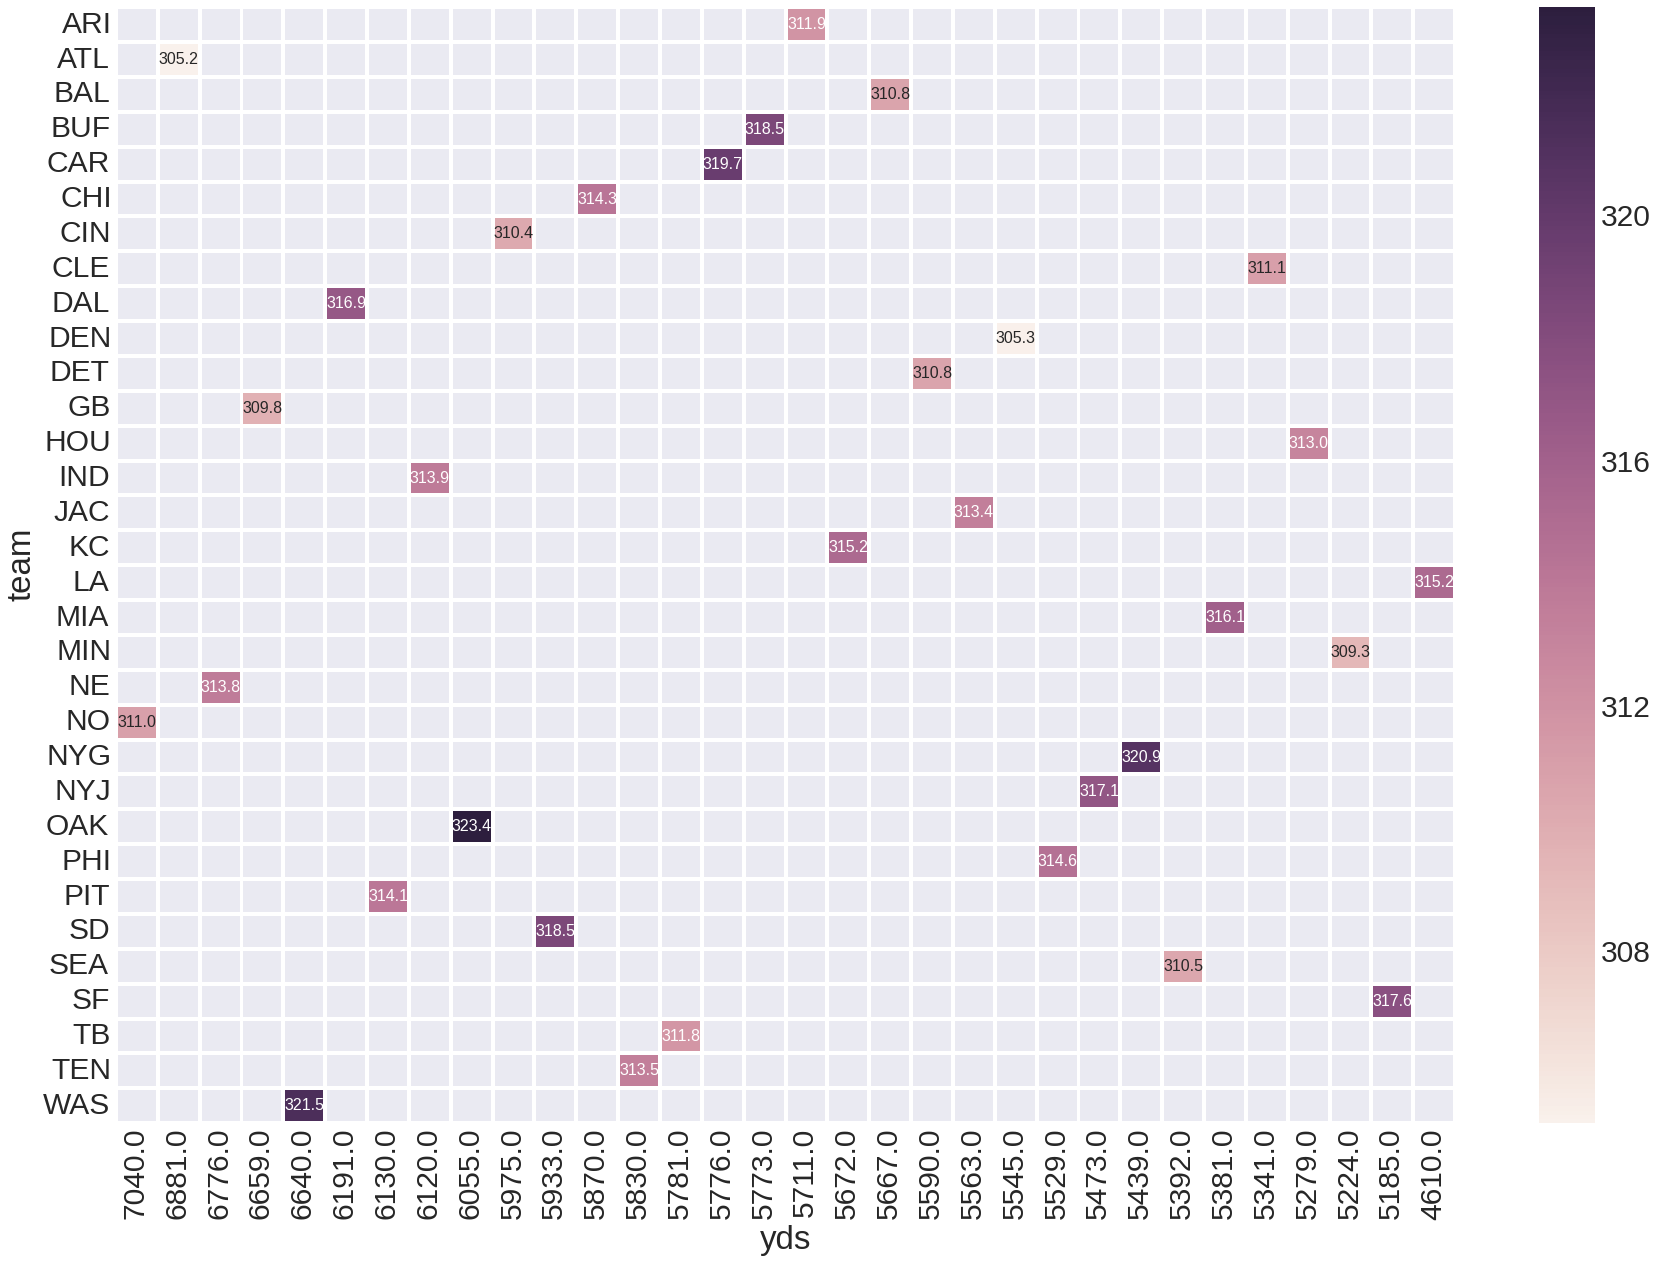

In [535]:
import sys
import time

df_team = pd.read_sql("select team_id from team", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_oht1 = pd.DataFrame([])

for x in df_team['team_id']:
        df_oht = pd.read_sql("select team, round(avg(weight),2) AS ht \
        from player \
        WHERE player.status = 'Active' AND (player.position = 'OT' or player.position = 'OG' or player.position = 'C' \
        or player.position = 'T' or player.position = 'OL' or player.position = 'G') \
        AND team = %(team)s \
        group by team", conn, params={'team':x})

#       df_oht = df_oht.dropna()
        df_oht1 = df_oht1.append(df_oht, ignore_index=True)
        
# print df_oht1
       
        

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
        df_tar = pd.read_sql("select player.team, \
        sum(play_player.rushing_yds) + sum(play_player.receiving_yds) AS yds \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY player.team \
        ORDER by yds asc", conn, params={'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

df_tot = pd.merge(df_tot, df_oht1, how='inner')



fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches

sns.set(font_scale=3)

# Load the example flights dataset and conver to long-form
# df = sns.load_dataset("df_tot")
height = df_tot.pivot("team", "yds", "ht")

# Draw a heatmap with the numeric values in each cell
ax = sns.heatmap(height, annot=True, fmt='.1f', linewidth=3, annot_kws={"size":16}, ax=ax)
ax.invert_xaxis()


# Exploratory Data Analysis on Offensive Lines

This is a heatmap with all NFL teams average offensive line height and total yards for the 2016 season

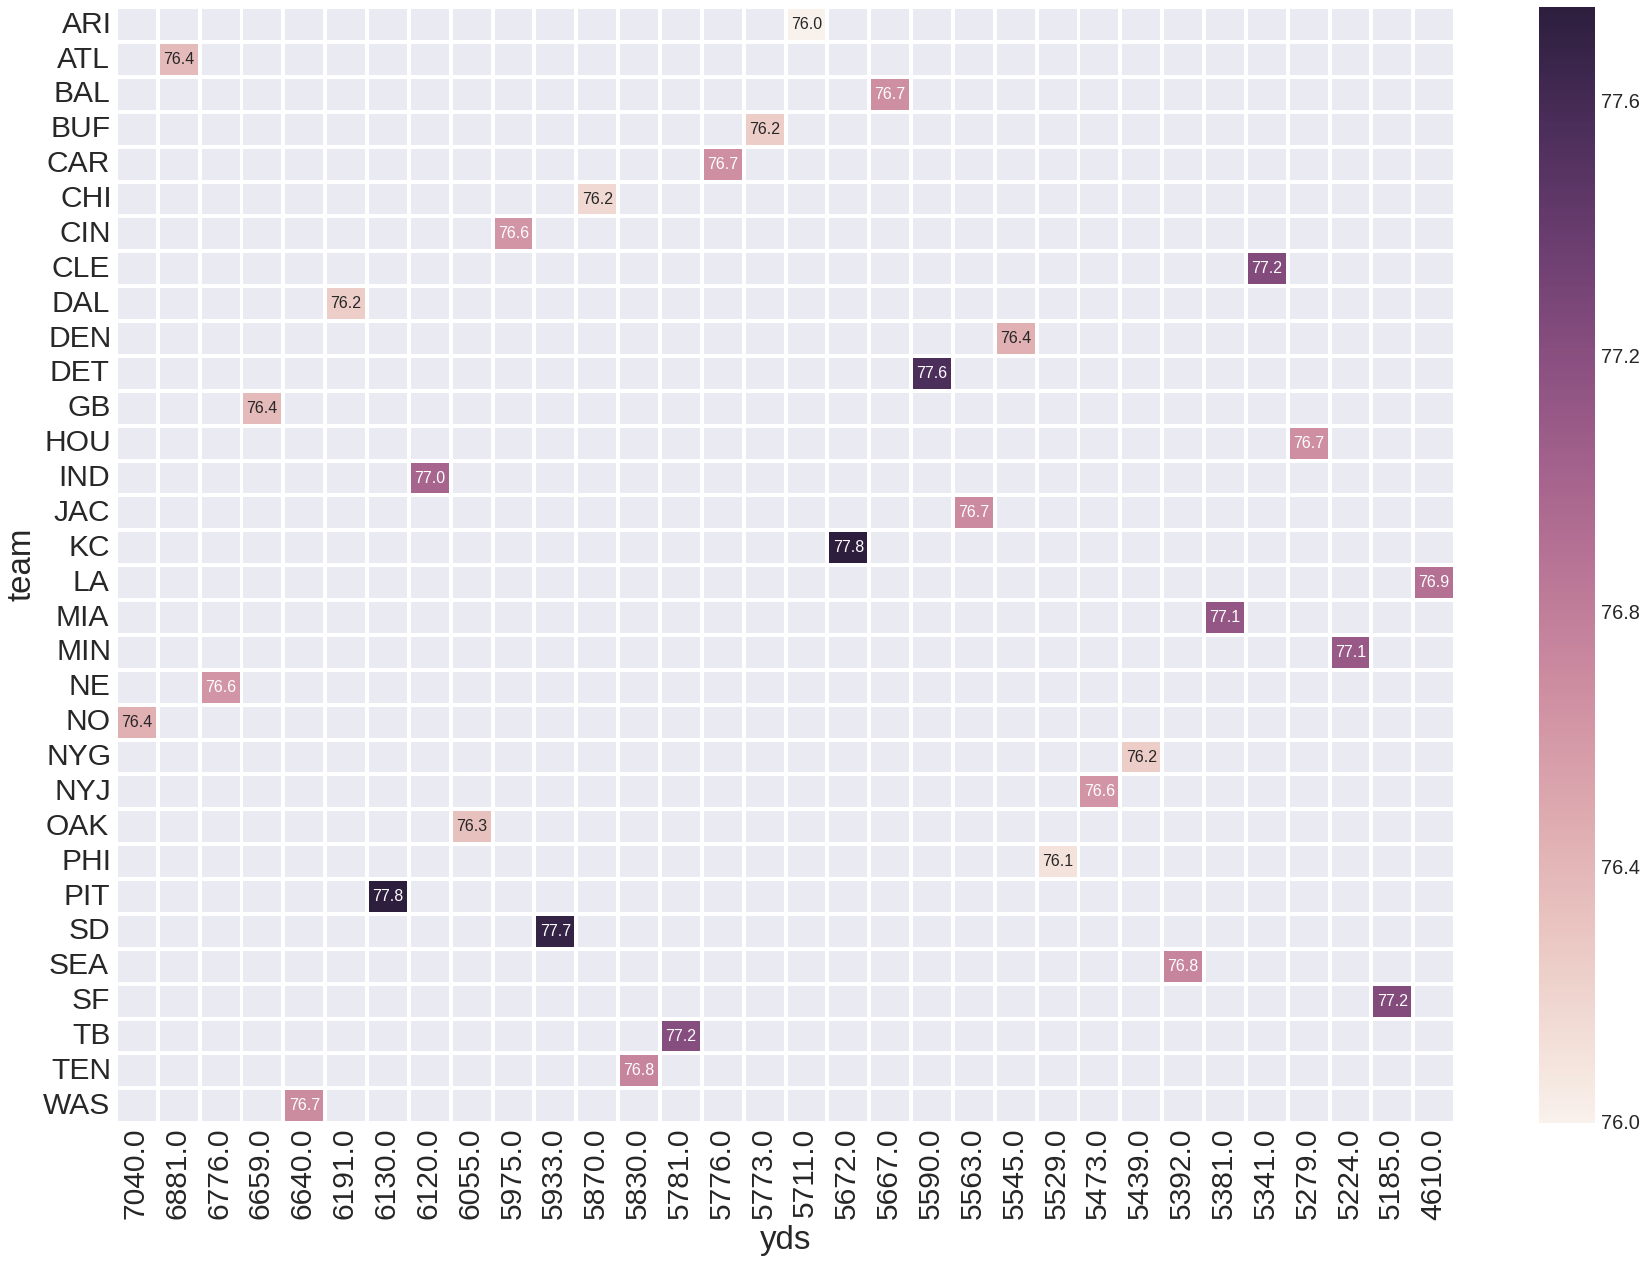

In [536]:
import sys
import time

df_team = pd.read_sql("select team_id from team", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_oht1 = pd.DataFrame([])

for x in df_team['team_id']:
        df_oht = pd.read_sql("select team, round(avg(height),2) AS ht \
        from player \
        WHERE player.status = 'Active' AND (player.position = 'OT' or player.position = 'OG' or player.position = 'C' \
        or player.position = 'T' or player.position = 'OL' or player.position = 'G') \
        AND team = %(team)s \
        group by team", conn, params={'team':x})

#       df_oht = df_oht.dropna()
        df_oht1 = df_oht1.append(df_oht, ignore_index=True)
        
# print df_oht1
       
        

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
        df_tar = pd.read_sql("select player.team, \
        sum(play_player.rushing_yds) + sum(play_player.receiving_yds) AS yds \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY player.team \
        ORDER by yds asc", conn, params={'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

df_tot = pd.merge(df_tot, df_oht1, how='inner')



fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches

sns.set(font_scale=2)

# Load the example flights dataset and conver to long-form
# df = sns.load_dataset("df_tot")
height = df_tot.pivot("team", "yds", "ht")

# Draw a heatmap with the numeric values in each cell
ax = sns.heatmap(height, annot=True, fmt='.1f', linewidth=3, annot_kws={"size":16}, ax=ax)
ax.invert_xaxis()

# Exploratory Data Analysis on Offensive Lines

This is a heatmap with all NFL teams average offensive line height and total passing yards for the 2016 season

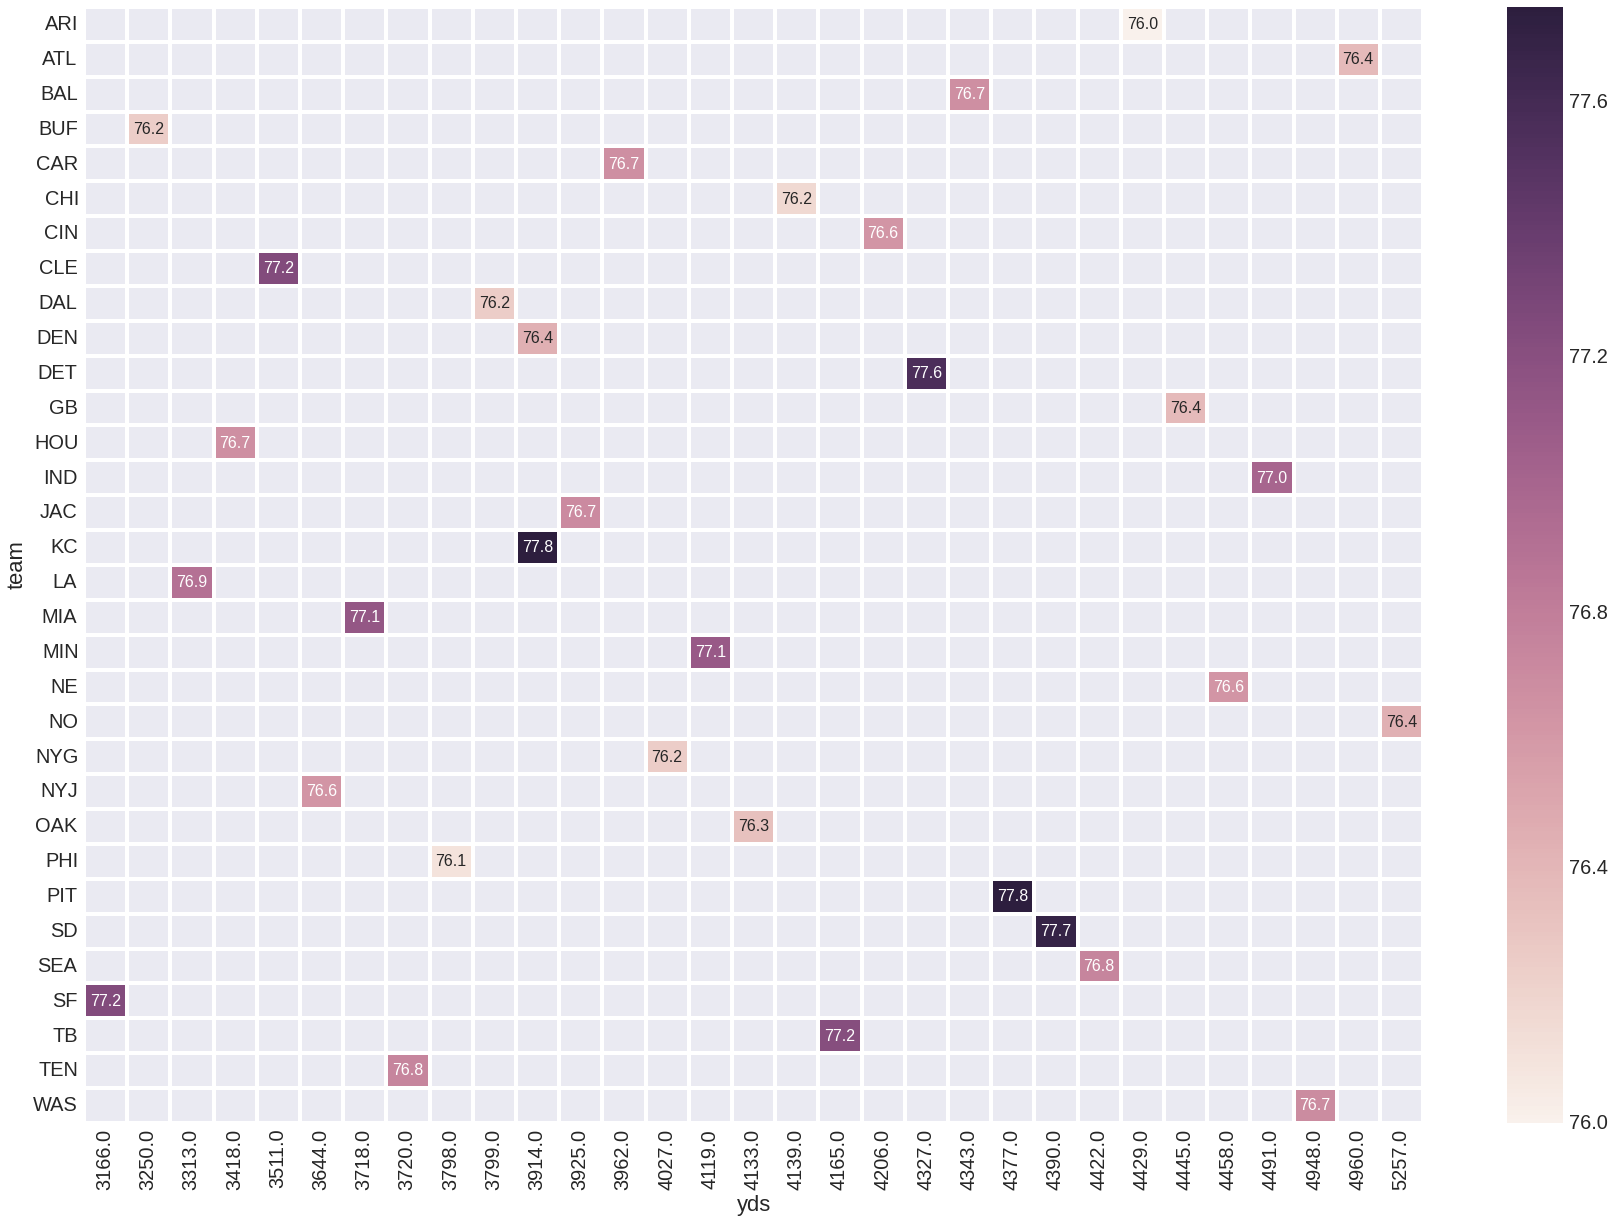

In [733]:
import sys
import time

df_team = pd.read_sql("select team_id from team", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_oht1 = pd.DataFrame([])

for x in df_team['team_id']:
        df_oht = pd.read_sql("select team, round(avg(height),2) AS ht \
        from player \
        WHERE player.status = 'Active' AND (player.position = 'OT' or player.position = 'OG' or player.position = 'C' \
        or player.position = 'T' or player.position = 'OL' or player.position = 'G') \
        AND team = %(team)s \
        group by team", conn, params={'team':x})

#       df_oht = df_oht.dropna()
        df_oht1 = df_oht1.append(df_oht, ignore_index=True)
        
# print df_oht1
       
        

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
        df_tar = pd.read_sql("select player.team, \
        sum(play_player.passing_yds) AS yds \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY player.team \
        ORDER by yds asc", conn, params={'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

df_tot = pd.merge(df_tot, df_oht1, how='inner')



fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches

sns.set(font_scale=2)

# Load the example flights dataset and conver to long-form
# df = sns.load_dataset("df_tot")
height = df_tot.pivot("team", "yds", "ht")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(height, annot=True, fmt='.1f', linewidth=3, annot_kws={"size":16}, ax=ax)


# Exploratory Data Analysis on Offensive Lines

This is a heatmap with all NFL teams average offensive line height and total touchdowns for the 2016 season

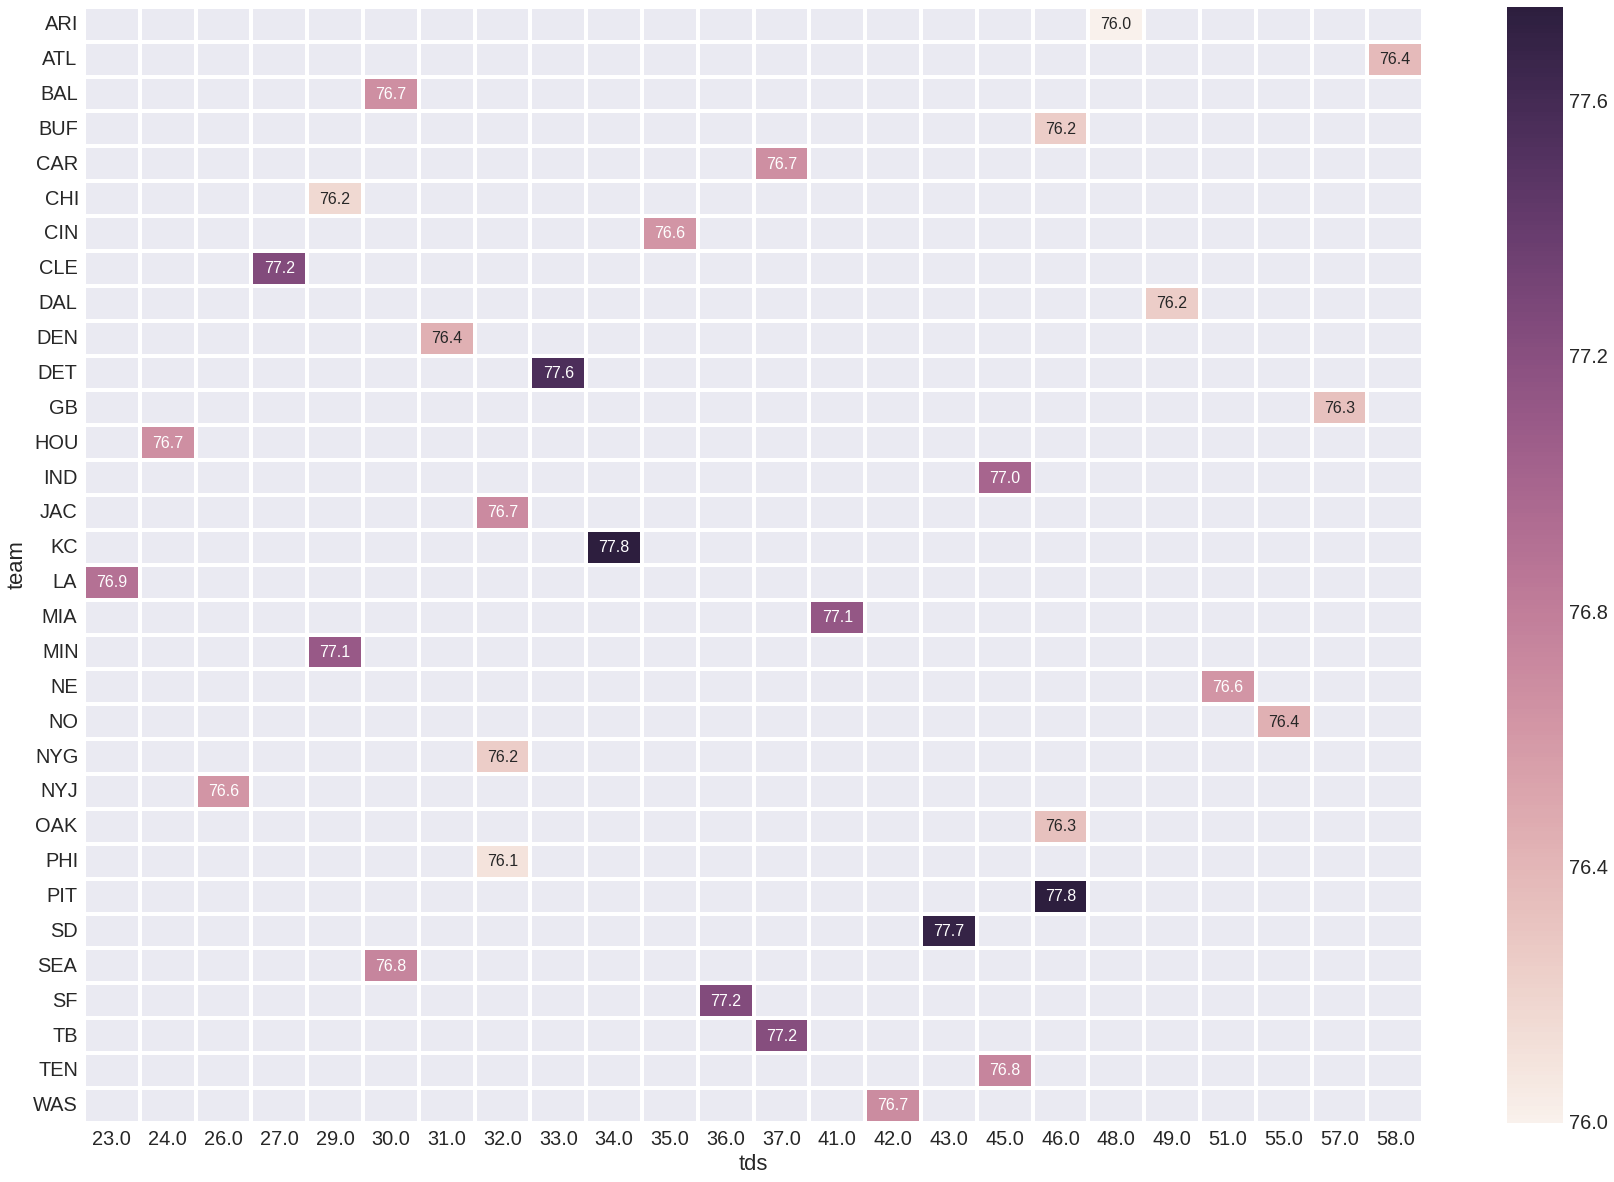

In [480]:
import sys
import time

df_team = pd.read_sql("select team_id from team", conn)

df_week = pd.read_sql("SELECT distinct game.week from game \
WHERE game.season_year = '2016' \
AND game.season_type = 'Regular' \
AND game.finished = 'Yes' \
order by week asc", conn)

# df_week = df_week[:6]

df_oht1 = pd.DataFrame([])

for x in df_team['team_id']:
        df_oht = pd.read_sql("select team, round(avg(height),2) AS ht \
        from player \
        WHERE player.status = 'Active' AND (player.position = 'OT' or player.position = 'OG' or player.position = 'C' \
        or player.position = 'T' or player.position = 'OL' or player.position = 'G') \
        AND team = %(team)s \
        group by team", conn, params={'team':x})

#       df_oht = df_oht.dropna()
        df_oht1 = df_oht1.append(df_oht, ignore_index=True)
        
# print df_oht1
       
        

df_tot = pd.DataFrame([])

for team in df_team['team_id']:
        df_tar = pd.read_sql("select player.team, \
        sum(play_player.rushing_tds) + sum(play_player.passing_tds) AS tds \
        from player \
        inner join play_player \
        ON player.player_id = play_player.player_id \
        inner join game \
        on game.gsis_id = play_player.gsis_id \
        WHERE game.season_year = '2016' \
        AND game.season_type = 'Regular' \
        AND game.finished = 'Yes' \
        AND player.team =  %(team)s\
        AND player.team !=  'UNK' \
        GROUP BY player.team \
        ORDER by tds asc", conn, params={'team':team})
        
        df_tot = df_tot.append(df_tar, ignore_index=True)

df_tot = pd.merge(df_tot, df_oht1, how='inner')



fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches

sns.set(font_scale=2)

# Load the example flights dataset and conver to long-form
# df = sns.load_dataset("df_tot")
height = df_tot.pivot("team", "tds", "ht")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(height, annot=True, fmt='.1f', linewidth=3, annot_kws={"size":16}, ax=ax)
